# README.

This notebook shows how to do some very basic analysis of the measurements.

In [1]:
import cli
import cv2
import matplotlib.pyplot as plt
import numpy as np  

In [2]:

# get all data from the image_data table
results_jpg = cli.execute_command_filterjpgs(
    blur_variance_threshold=0.0, 
    remove_errors=True, 
    remove_rejects=True, 
    sort_key="blur_variance", 
    sort_reverse=True)["results"]

# get all data from the pointcloud_data table
results_pcd = cli.execute_command_filterpcds(
    number_of_points_threshold=0, 
    confidence_avg_threshold=0.0,
    remove_errors=True, 
    remove_rejects=True, 
    sort_key="number_of_points", 
    sort_reverse=False)["results"]


Filtering DB...
Filtering DB...


# Centroid
The centroid $\vec{p}$ in a point cloud $\mathcal{P}$ is based on the average value of all points in the cloud. It is calculated as follows by

$\bar{p} = \dfrac{1}{N} \sum_{i=1}^N \vec{p}_i \quad \forall \vec{p}_i \in \mathcal{P}$, 

where $N$ is the number of points in the cloud. The centroid contains the background, as well as the child -- if availiable.

To ease the plot of the data, a function 'plotPCDDataFromDB' is implemented:

In [3]:
def plotPCDDataFromDB(column_name, color='r'):
    column_vals = [result[column_name] for result in results_pcd]
    print("Min:", np.min(column_vals))                  
    print("Avg:", np.mean(column_vals))                  
    print("STD:", np.std(column_vals))                  
    print("Max:", np.max(column_vals))  
    plt.figure(figsize=(20, 6))
    plt.hist(column_vals, bins=100, color=color)
    plt.xlabel(column_name +  'x in meters')
    plt.show()

Afterwards the values of the centroids are plotted in a histogram: 

Min: -0.229407
Avg: 0.0015170616098644418
STD: 0.04313791127895332
Max: 0.19578


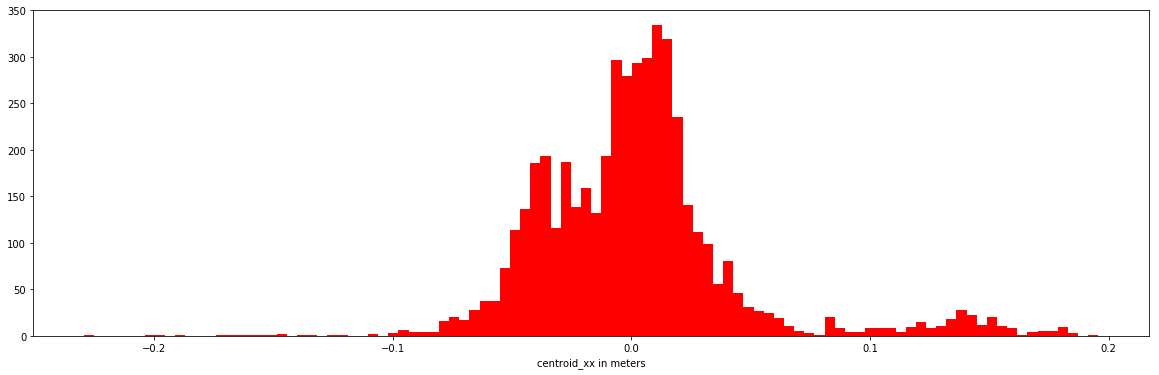

Min: -0.193981
Avg: -0.006366340161324297
STD: 0.019918818146135216
Max: 0.126658


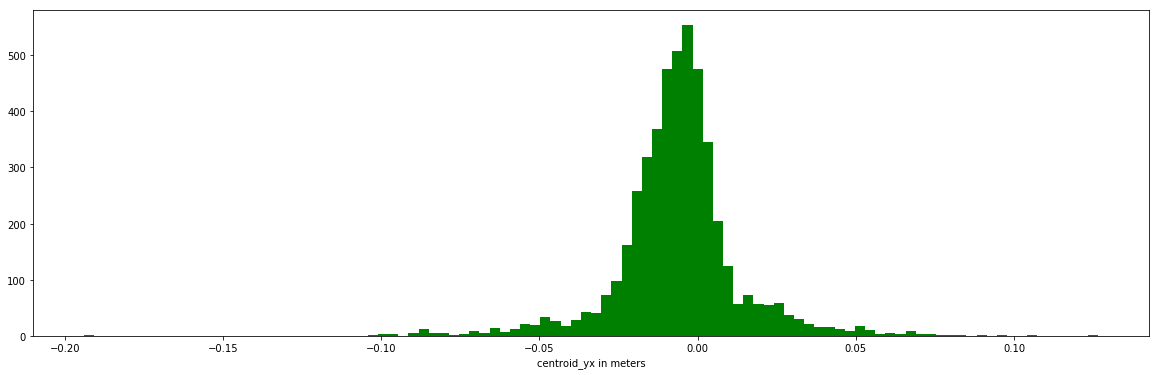

Min: 0.226241
Avg: 1.154378483211679
STD: 0.2621877529266046
Max: 1.88103


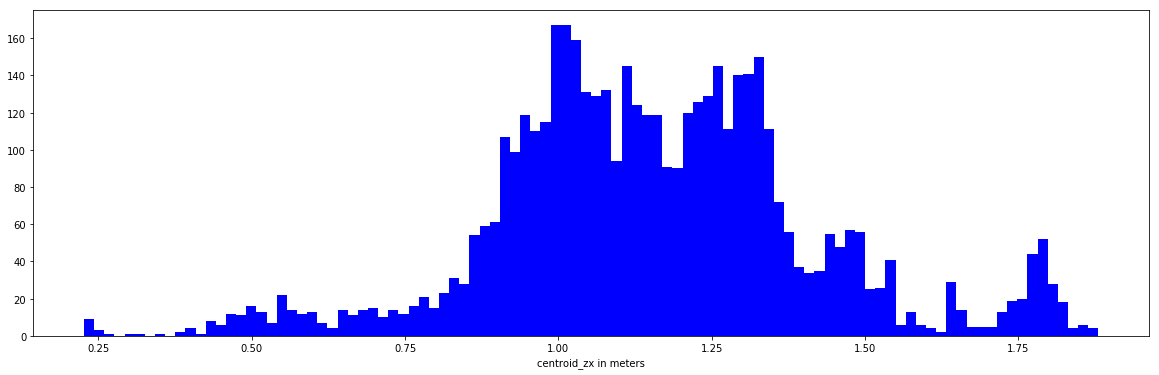

In [4]:
plotPCDDataFromDB("centroid_x", 'r')    
plotPCDDataFromDB("centroid_y", 'g')    
plotPCDDataFromDB("centroid_z", 'b')    

To give this data a more understandable impression, you can also plot as in a 3d scatter plot. 

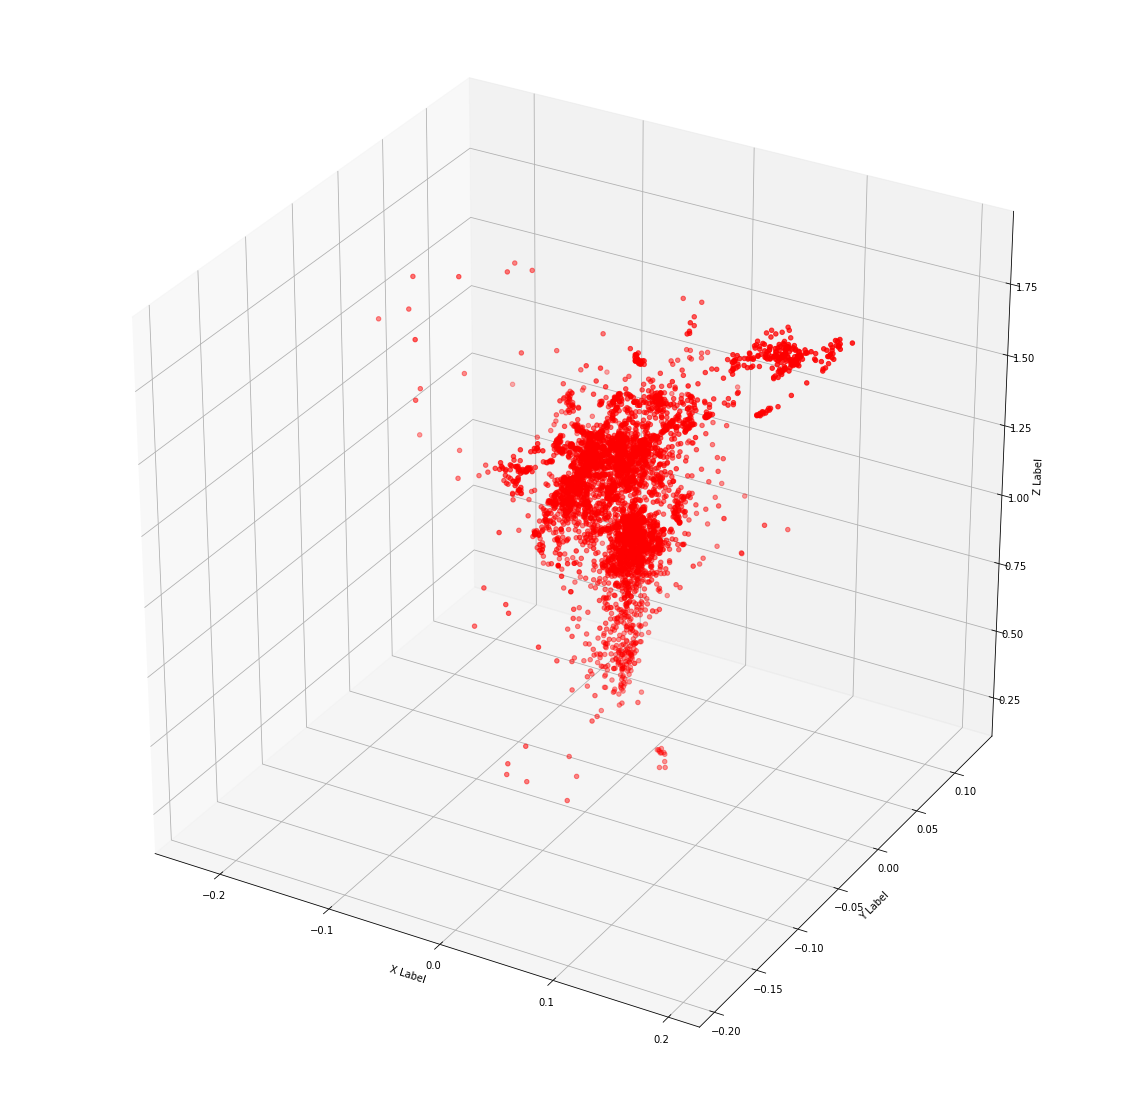

In [5]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

x = [result["centroid_x"] for result in results_pcd]
y = [result["centroid_y"] for result in results_pcd]
z = [result["centroid_z"] for result in results_pcd]


ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Standard Deviation
The same procedure can be applied to other statistic values from the point cloud, e.g. the standard deviation (stdev) of the data in the point cloud. 

Min: -0.229407
Avg: 0.0015170616098644418
STD: 0.04313791127895332
Max: 0.19578


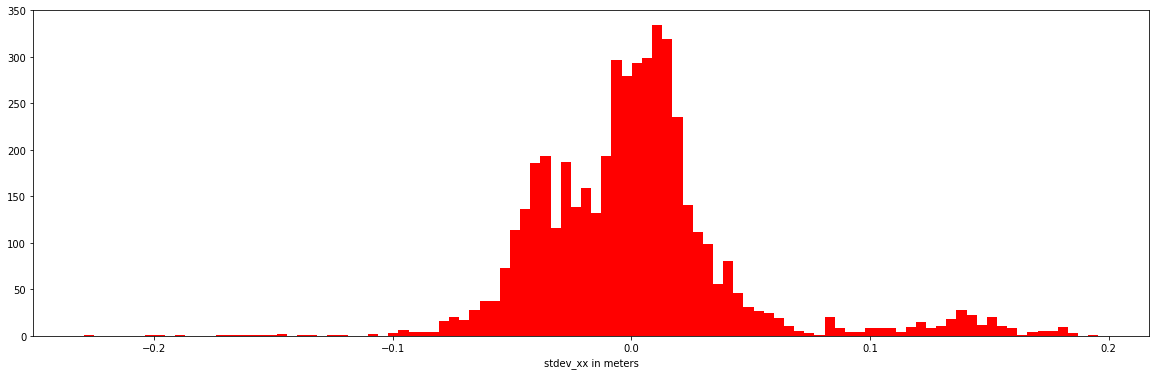

Min: -0.193981
Avg: -0.006366340161324297
STD: 0.019918818146135216
Max: 0.126658


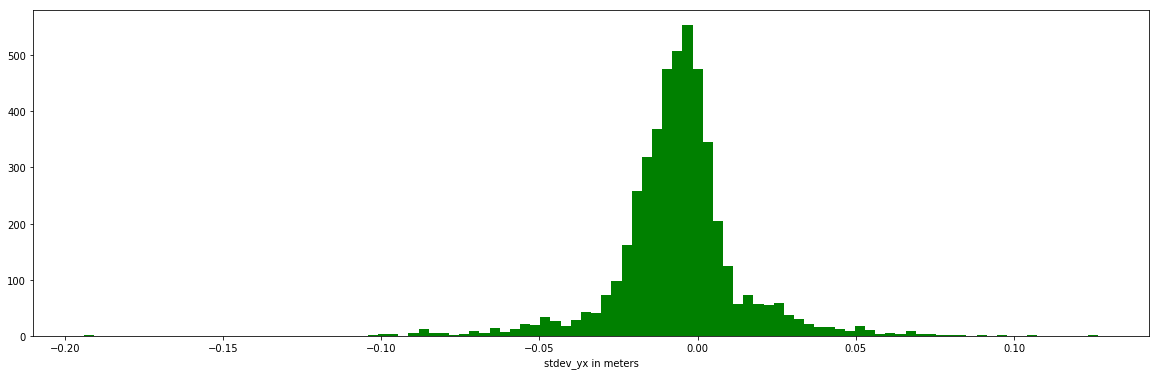

Min: 0.226241
Avg: 1.154378483211679
STD: 0.2621877529266046
Max: 1.88103


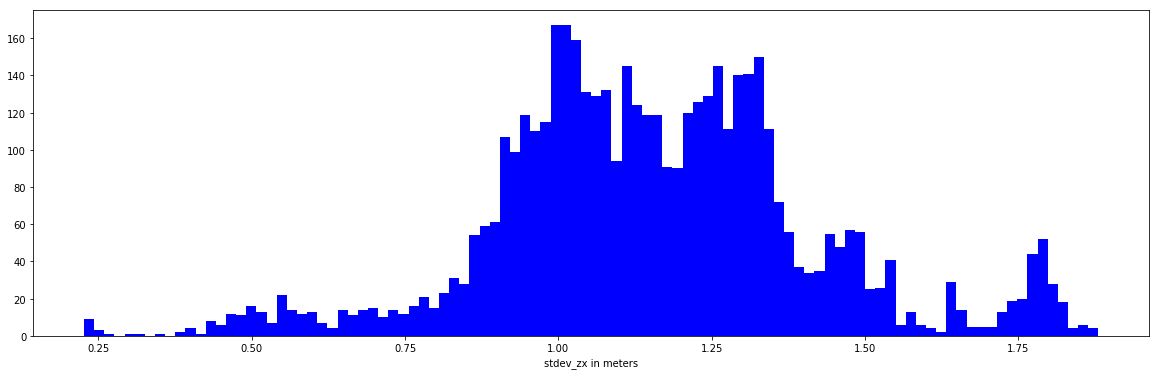

In [6]:
plotPCDDataFromDB("stdev_x", 'r')    
plotPCDDataFromDB("stdev_y", 'g')   
plotPCDDataFromDB("stdev_z", 'b')    

# Number of Points in the Cloud

Min: 2730
Avg: 35779.25464025026
STD: 2915.5673770202225
Max: 38005


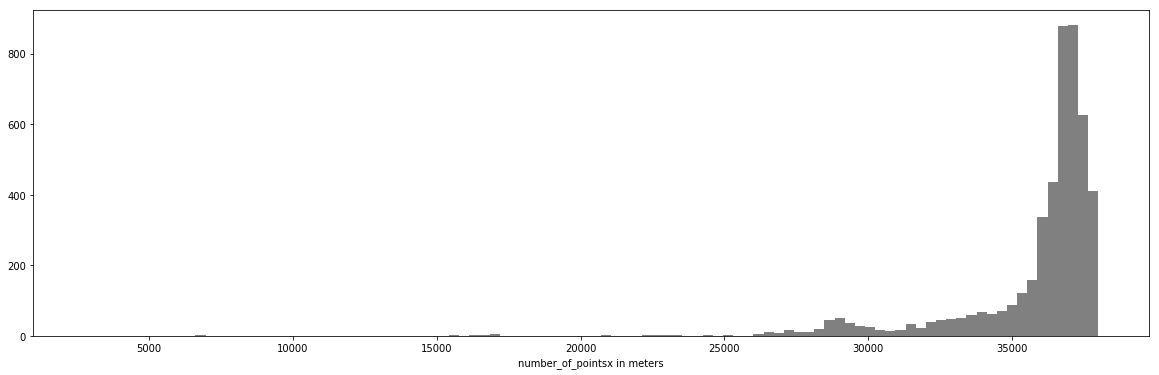

In [7]:
plotPCDDataFromDB("number_of_points", 'gray')    


# Confidence
Additionally, the average confidence value in the point cloud can be displayed: 

Min: 0.507505
Avg: 0.8965470279457768
STD: 0.09172700854876475
Max: 1.0


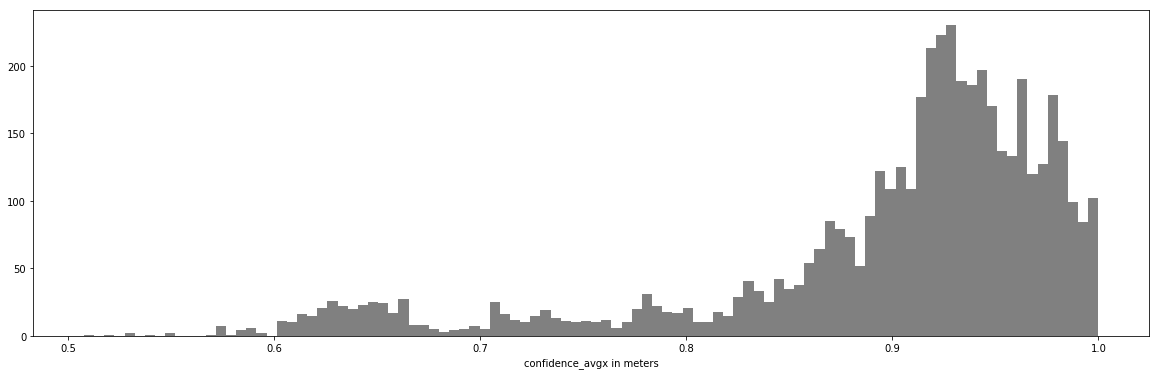

In [8]:
plotPCDDataFromDB("confidence_avg", 'gray')  